In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from PIL import Image
from glob import glob
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras import models
from PIL import Image


In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!unzip '/content/drive/MyDrive/data/Input_data.zip'

Streaming output truncated to the last 5000 lines.
 extracting: Input_data/thm_dir_N00_330_95.png  
 extracting: Input_data/thm_dir_N00_330_81.png  
 extracting: Input_data/thm_dir_N00_330_97.png  
 extracting: Input_data/thm_dir_N00_330_9.png  
 extracting: Input_data/thm_dir_N00_330_75.png  
 extracting: Input_data/thm_dir_N00_330_8.png  
 extracting: Input_data/thm_dir_N00_330_98.png  
 extracting: Input_data/thm_dir_N00_330_73.png  
 extracting: Input_data/thm_dir_N00_330_93.png  
 extracting: Input_data/thm_dir_N00_330_68.png  
 extracting: Input_data/thm_dir_N00_330_85.png  
 extracting: Input_data/thm_dir_N00_330_60.png  
 extracting: Input_data/thm_dir_N00_330_78.png  
 extracting: Input_data/thm_dir_N00_330_54.png  
 extracting: Input_data/thm_dir_N00_330_94.png  
 extracting: Input_data/thm_dir_N00_330_87.png  
 extracting: Input_data/thm_dir_N00_330_67.png  
 extracting: Input_data/thm_dir_N00_330_86.png  
 extracting: Input_data/thm_dir_N00_330_84.png  
 extracting: Input_d

In [5]:
!unzip '/content/drive/MyDrive/data/output filled data.zip'

Archive:  /content/drive/MyDrive/data/output filled data.zip
replace output filled data/thm_dir_N-30_000_-30_0_0_30_2_32_km_segrng_0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: output filled data/thm_dir_N-30_000_-30_0_0_30_2_32_km_segrng_0.png  
  inflating: output filled data/thm_dir_N-30_000_-30_0_0_30_2_32_km_segrng_1.png  
  inflating: output filled data/thm_dir_N-30_000_-30_0_0_30_2_32_km_segrng_10.png  
  inflating: output filled data/thm_dir_N-30_000_-30_0_0_30_2_32_km_segrng_100.png  
  inflating: output filled data/thm_dir_N-30_000_-30_0_0_30_2_32_km_segrng_101.png  
  inflating: output filled data/thm_dir_N-30_000_-30_0_0_30_2_32_km_segrng_102.png  
  inflating: output filled data/thm_dir_N-30_000_-30_0_0_30_2_32_km_segrng_103.png  
  inflating: output filled data/thm_dir_N-30_000_-30_0_0_30_2_32_km_segrng_104.png  
  inflating: output filled data/thm_dir_N-30_000_-30_0_0_30_2_32_km_segrng_105.png  
  inflating: output filled data/thm_dir_N-30_000_-30_0_0_30_2_

In [ ]:
import glob
import os 
removing_files = glob.glob('/content/Input_data/thm_dir_N30_000_*.png')
for i in removing_files:
    os.remove(i)

In [ ]:
import glob
import os 
removing_files = glob.glob('/content/Input_data/thm_dir_N30_030_*.png')
for i in removing_files:
    os.remove(i)

In [ ]:

import glob
import os 
removing_files = glob.glob('/content/output filled data/thm_dir_N-30_030_-30_0_30_60_2_32_km_segrng_*.png')
for i in removing_files:
    os.remove(i)

In [ ]:

import glob
import os 
removing_files = glob.glob('/content/output filled data/thm_dir_N00_240_0_30_-120_-90_2_32_km_segrng_*.png')
for i in removing_files:
    os.remove(i)

In [ ]:
_, _, files = next(os.walk("/content/Input_data"))
file_count = len(files)
print(file_count)

In [ ]:
_, _, files = next(os.walk("/content/output filled data"))
file_count = len(files)
print(file_count)

In [ ]:
import pandas as pd
def load_img_path(folder):
    L=[]
    for filename in os.listdir(folder) :
        L.append(os.path.join(folder,filename))
    return L

test = []
Name = []
input_image = load_img_path('/content/Input_data')
output_filled = load_img_path('/content/output filled data')

for i in range(len(output_filled)):
        if output_filled[i][output_filled[i].index('N')+1] == '-' :
            nom=output_filled[i][output_filled[i].index('N'):output_filled[i].index('N')+8]
        else :            
            nom=output_filled[i][output_filled[i].index('N'):output_filled[i].index('N')+7]
        id_image_last_caracter=output_filled[i].index('.png')
        id_image_first_caracter=len(output_filled[i])-output_filled[i][::-1].index('_')
        ch='/content/Input_data/'+'thm_dir_'+nom+'_'+str(output_filled[i][id_image_first_caracter:id_image_last_caracter])+'.png'
        Name.append(nom)

        test.append(ch)

In [ ]:
data=[]
for i in range(4950) :
    data.append([test[i],output_filled[i]])
df=pd.DataFrame(data,columns=['input_image','output_filled'])
N=210
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
img=cv2.imread(df.input_image.iloc[N])
plt.imshow(img)
plt.subplot(1,3,2)
msk=cv2.imread(df.output_filled.iloc[N])
plt.imshow(msk)
plt.subplot(1,3,3)
plt.imshow(img)
plt.imshow(msk,alpha=0.5)

In [ ]:
df.iloc[N]['input_image'],df.iloc[N]['output_filled']

In [ ]:
data_train,data_test=train_test_split(df,test_size=0.1)

data_train,data_val=train_test_split(data_train,test_size=0.2)
datagen = ImageDataGenerator()
datagenM = ImageDataGenerator(rescale=1./255)



image_train=datagen.flow_from_dataframe(data_train,  
                                    target_size=(256,256), 
                                    color_mode='grayscale',
                                    shuffle=True,
                                    seed=42,
                                    x_col ="input_image", 
                                    batch_size=32,
                                    class_mode=None
                                    
)
mask_train=datagenM.flow_from_dataframe(data_train, 
                                    target_size=(256,256), 
                                    color_mode='grayscale',
                                    shuffle=True,
                                    seed=42,
                                    x_col ="output_filled", 
                                    batch_size=32,
                                    class_mode=None
)
image_validation=datagen.flow_from_dataframe(data_val,  
                                    target_size=(256,256), 
                                    color_mode='grayscale',
                                    shuffle=True,
                                    seed=42,
                                    x_col ="input_image", 
                                    batch_size=32,
                                    class_mode=None
)

mask_validation=datagenM.flow_from_dataframe(data_val, 
                                    target_size=(256,256), 
                                    color_mode='grayscale',
                                    shuffle=True,
                                    seed=42,
                                    x_col ="output_filled", 
                                    batch_size=32,
                                    class_mode=None
)
train_gen=zip(image_train,mask_train)
valid_gen=zip(image_validation,mask_validation)



In [ ]:
img=mask_train
img1=image_train
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.imshow(img[0][0][:,:,0])
plt.title('mask')

plt.subplot(1,2,2)
plt.imshow(np.squeeze(img1[0][0][:,:,0]))

plt.title('image')



In [ ]:
import os
import sys

from keras.models import Model, load_model
from keras.layers import Dense, Input, BatchNormalization, Dropout
from keras.layers import Concatenate
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D, UpSampling2D
from keras import backend as K
from keras import optimizers
from keras import metrics
import datetime
import glob
import random
from pandas import DataFrame

import numpy as np
import matplotlib.pyplot as plt
def unet1(): 
    ACT = 'relu'
    KERN_SIZE = 3
    FILTERS=[16,24,32,48,64,96,128,128]
    
    z1 = Input(shape=(256,256,1))
    print('z1: {}'.format(z1.shape))

    z2 = Conv2D(FILTERS[0], KERN_SIZE, padding='same', activation=ACT)(z1)
    p2 = AveragePooling2D(pool_size=2)(z2)
    print('z2: {}, \np2: {}'.format(z2.shape, p2.shape))

    z3 = Conv2D(FILTERS[1], KERN_SIZE, padding='same', activation=ACT)(p2)
    p3 = AveragePooling2D(pool_size=2)(z3)
    print('z3: {}, \np3: {}'.format(z3.shape, p3.shape))

    z4 = Conv2D(FILTERS[2], KERN_SIZE, padding='same', activation=ACT)(p3)
    d4 = Dropout(0.2)(z4)
    p4 = AveragePooling2D(pool_size=2)(d4)
    print('z4: {}, \np4: {}'.format(z4.shape, p4.shape))

    z5 = Conv2D(FILTERS[3], KERN_SIZE, padding='same', activation=ACT)(p4)
    d5 = Dropout(0.2)(z5)
    p5 = AveragePooling2D(pool_size=2)(d5)
    print('z5: {}'.format(z5.shape))

    z6 = Conv2D(FILTERS[4], KERN_SIZE, padding='same', activation=ACT)(p5)
    d6 = Dropout(0.3)(z6)
    p6 = AveragePooling2D(pool_size=2)(d6)

    z7 = Conv2D(FILTERS[5], KERN_SIZE, padding='same', activation=ACT)(p6)
    d7 = Dropout(0.4)(z7)
    p7 = AveragePooling2D(pool_size=2)(d7)

    z8 = Conv2D(FILTERS[6], KERN_SIZE, padding='same', activation=ACT)(p7)
    d8 = Dropout(0.5)(z8)
    p8 = AveragePooling2D(pool_size=2)(d8)

    z9 = Conv2D(FILTERS[7], KERN_SIZE, padding='same', activation=ACT)(p8)
    d9 = Dropout(0.5)(z9)

    u9 = UpSampling2D(size=2)(d9)
    q9 = Conv2D(FILTERS[6], KERN_SIZE, padding='same', activation=ACT)(u9)
    d9b = Dropout(0.5)(q9)
    a9 = Concatenate()([d9b,z8])

    u8 = UpSampling2D(size=2)(a9)
    q8 = Conv2D(FILTERS[5], KERN_SIZE, padding='same', activation=ACT)(u8)
    d8b = Dropout(0.4)(q8)
    a8 = Concatenate()([d8b,z7])

    u7 = UpSampling2D(size=2)(a8)
    q7 = Conv2D(FILTERS[4], KERN_SIZE, padding='same', activation=ACT)(u7)
    d7b = Dropout(0.3)(q7)
    a7 = Concatenate()([d7b,z6])

    u6 = UpSampling2D(size=2)(a7)
    q6 = Conv2D(FILTERS[3], KERN_SIZE, padding='same', activation='relu')(u6)
    d6b = Dropout(0.2)(q6)
    a6 = Concatenate()([d6b,z5])

    u5 = UpSampling2D(size=2)(a6)
    q5 = Conv2D(FILTERS[2], KERN_SIZE, padding='same', activation=ACT)(u5)
    d5b = Dropout(0.2)(q5)
    a5 = Concatenate()([d5b,z4])

    u4 = UpSampling2D(size=2)(a5)
    q4 = Conv2D(FILTERS[1], KERN_SIZE, padding='same', activation=ACT)(u4)
    a4 = Concatenate()([q4,z3])

    u3 = UpSampling2D(size=2)(a4)
    q3 = Conv2D(FILTERS[0], KERN_SIZE, padding='same', activation=ACT)(u3)
    a3 = Concatenate()([q3,z2])

    z_final = Conv2D(1, KERN_SIZE, padding='same', activation='sigmoid')(a3)
    #z8 activation = sigmoid or softmax

    return Model(inputs = z1, outputs = z_final)

In [ ]:
import os
import sys

from keras.models import Model, load_model
from keras.layers import Dense, Input, BatchNormalization, Dropout
from keras.layers import Concatenate
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D, UpSampling2D
from keras import backend as K
from keras import optimizers
from keras import metrics
import datetime
import glob
import random
from pandas import DataFrame

import numpy as np
import matplotlib.pyplot as plt
def unet0(KERN_SIZE=3, ACT='relu', FILTERS=[16,24,32,48,64,96,128,128]):
    #ACT = 'relu'
    #KERN_SIZE = 3
    #FILTERS=[16,24,32,48,64,96,128,128]
    
    z1 = Input(shape=(None,None,1))
    print('z1: {}'.format(z1.shape))

    z2 = Conv2D(FILTERS[0], KERN_SIZE, padding='same', activation=ACT)(z1)
    p2 = AveragePooling2D(pool_size=2)(z2)
    print('z2: {}, \np2: {}'.format(z2.shape, p2.shape))

    z3 = Conv2D(FILTERS[1], KERN_SIZE, padding='same', activation=ACT)(p2)
    p3 = AveragePooling2D(pool_size=2)(z3)
    print('z3: {}, \np3: {}'.format(z3.shape, p3.shape))

    z4 = Conv2D(FILTERS[2], KERN_SIZE, padding='same', activation=ACT)(p3)
    d4 = Dropout(0.2)(z4)
    p4 = AveragePooling2D(pool_size=2)(d4)
    print('z4: {}, \np4: {}'.format(z4.shape, p4.shape))

    z5 = Conv2D(FILTERS[3], KERN_SIZE, padding='same', activation=ACT)(p4)
    d5 = Dropout(0.2)(z5)
    p5 = AveragePooling2D(pool_size=2)(d5)
    print('z5: {}'.format(z5.shape))

    z6 = Conv2D(FILTERS[4], KERN_SIZE, padding='same', activation=ACT)(p5)
    d6 = Dropout(0.3)(z6)
    p6 = AveragePooling2D(pool_size=2)(d6)

    z7 = Conv2D(FILTERS[5], KERN_SIZE, padding='same', activation=ACT)(p6)
    d7 = Dropout(0.4)(z7)
    p7 = AveragePooling2D(pool_size=2)(d7)

    z8 = Conv2D(FILTERS[6], KERN_SIZE, padding='same', activation=ACT)(p7)
    d8 = Dropout(0.5)(z8)
    p8 = AveragePooling2D(pool_size=2)(d8)

    z9 = Conv2D(FILTERS[7], KERN_SIZE, padding='same', activation=ACT)(p8)
    d9 = Dropout(0.5)(z9)

    u9 = UpSampling2D(size=2)(d9)
    q9 = Conv2D(FILTERS[6], KERN_SIZE, padding='same', activation=ACT)(u9)
    d9b = Dropout(0.5)(q9)
    a9 = Concatenate()([d9b,z8])

    u8 = UpSampling2D(size=2)(a9)
    q8 = Conv2D(FILTERS[5], KERN_SIZE, padding='same', activation=ACT)(u8)
    d8b = Dropout(0.4)(q8)
    a8 = Concatenate()([d8b,z7])

    u7 = UpSampling2D(size=2)(a8)
    q7 = Conv2D(FILTERS[4], KERN_SIZE, padding='same', activation=ACT)(u7)
    d7b = Dropout(0.3)(q7)
    a7 = Concatenate()([d7b,z6])

    u6 = UpSampling2D(size=2)(a7)
    q6 = Conv2D(FILTERS[3], KERN_SIZE, padding='same', activation='relu')(u6)
    d6b = Dropout(0.2)(q6)
    a6 = Concatenate()([d6b,z5])

    u5 = UpSampling2D(size=2)(a6)
    q5 = Conv2D(FILTERS[2], KERN_SIZE, padding='same', activation=ACT)(u5)
    d5b = Dropout(0.2)(q5)
    a5 = Concatenate()([d5b,z4])

    u4 = UpSampling2D(size=2)(a5)
    q4 = Conv2D(FILTERS[1], KERN_SIZE, padding='same', activation=ACT)(u4)
    a4 = Concatenate()([q4,z3])

    u3 = UpSampling2D(size=2)(a4)
    q3 = Conv2D(FILTERS[0], KERN_SIZE, padding='same', activation=ACT)(u3)
    a3 = Concatenate()([q3,z2])

    z_final = Conv2D(1, KERN_SIZE, padding='same', activation='sigmoid')(a3)
    #z8 activation = sigmoid or softmax

    return Model(inputs = z1, outputs = z_final)




In [ ]:
model = unet0()
# tf.keras.optimizers.Adam(lr=1e-2)
model.compile( optimizer='adam' , loss = 'binary_crossentropy', metrics=['acc'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',patience=5)

In [21]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [22]:
batch_size=32
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("/content/bestmodel/filled_unet0_bs32_kern3.hdf5", monitor='val_loss', verbose=1,
save_best_only=True, mode='auto', period=1)
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=50,
    batch_size= batch_size,
    validation_steps=len(data_val) //batch_size,
    steps_per_epoch=len(data_train) //batch_size,
    callbacks=[checkpoint,tensorboard_callback]
)

Epoch 1/50
111/111 [==============================] - ETA: 0s - loss: 0.8160 - acc: 0.8731
Epoch 1: val_loss improved from inf to 0.42488, saving model to /content/bestmodel/filled_unet0_bs32_kern3.hdf5
111/111 [==============================] - 62s 495ms/step - loss: 0.8160 - acc: 0.8731 - val_loss: 0.4249 - val_acc: 0.9081
Epoch 2/50
111/111 [==============================] - ETA: 0s - loss: 0.3770 - acc: 0.8980
Epoch 2: val_loss improved from 0.42488 to 0.32753, saving model to /content/bestmodel/filled_unet0_bs32_kern3.hdf5
111/111 [==============================] - 57s 503ms/step - loss: 0.3770 - acc: 0.8980 - val_loss: 0.3275 - val_acc: 0.9120
Epoch 3/50
111/111 [==============================] - ETA: 0s - loss: 0.3253 - acc: 0.9057
Epoch 3: val_loss improved from 0.32753 to 0.29257, saving model to /content/bestmodel/filled_unet0_bs32_kern3.hdf5
111/111 [==============================] - 52s 469ms/step - loss: 0.3253 - acc: 0.9057 - val_loss: 0.2926 - val_acc: 0.9168
Epoch 4/50


In [23]:
model.save('/content/bestmodel/filled_unet0_bs32_kern3')

In [24]:
model5 = keras.models.load_model('/content/drive/MyDrive/data/aim/model_filled_unet_akram_1_2')


1/1 [==============================] - 0s 25ms/step


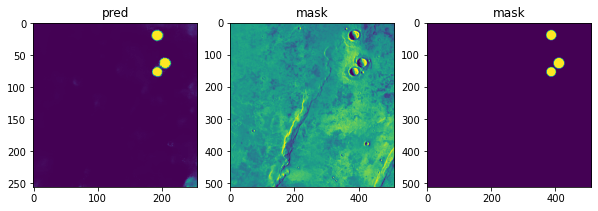

1/1 [==============================] - 0s 28ms/step


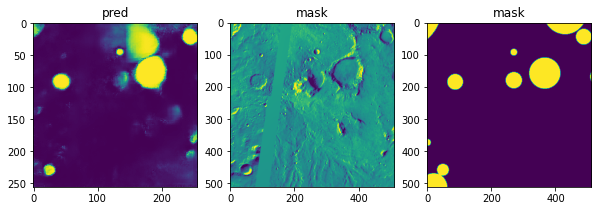

1/1 [==============================] - 0s 26ms/step


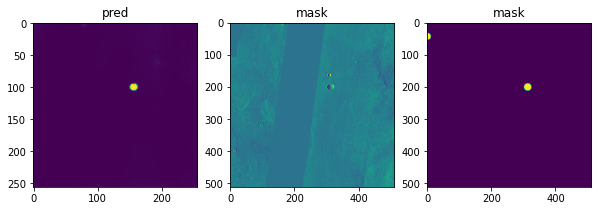

1/1 [==============================] - 0s 23ms/step


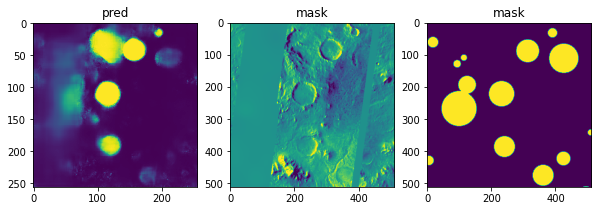

1/1 [==============================] - 0s 16ms/step


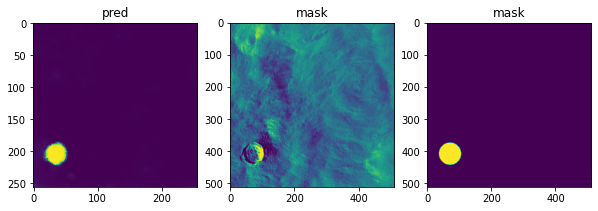

1/1 [==============================] - 0s 18ms/step


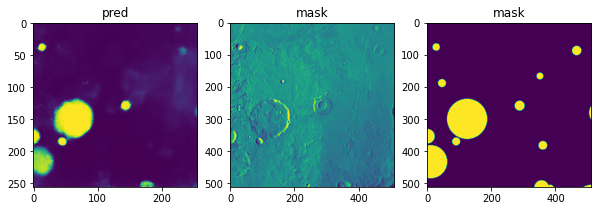

1/1 [==============================] - 0s 18ms/step


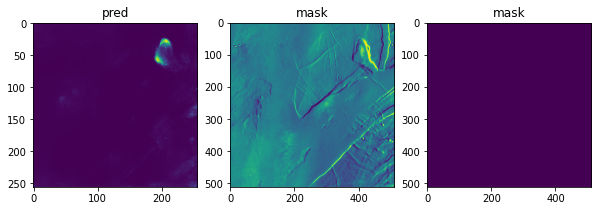

1/1 [==============================] - 0s 16ms/step


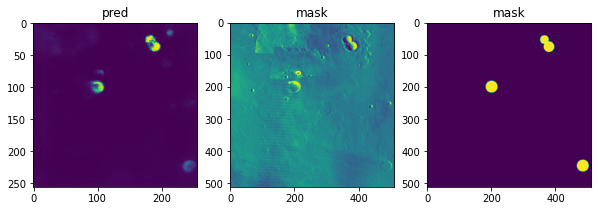

1/1 [==============================] - 0s 18ms/step


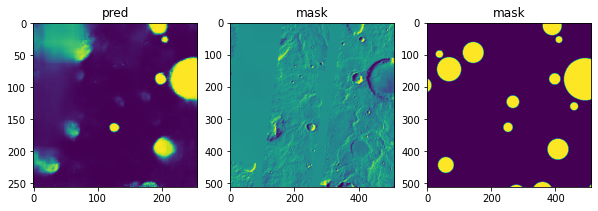

1/1 [==============================] - 0s 16ms/step


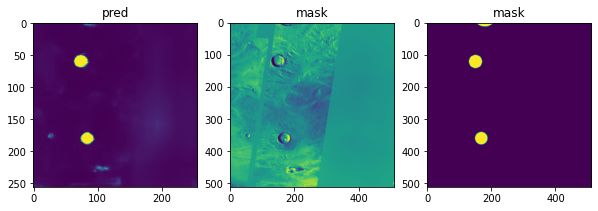

1/1 [==============================] - 0s 18ms/step


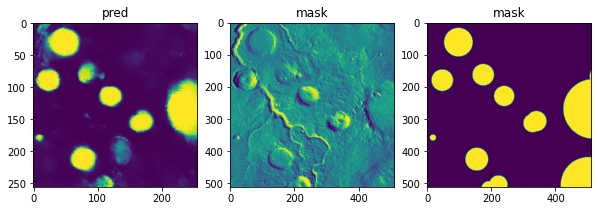

1/1 [==============================] - 0s 17ms/step


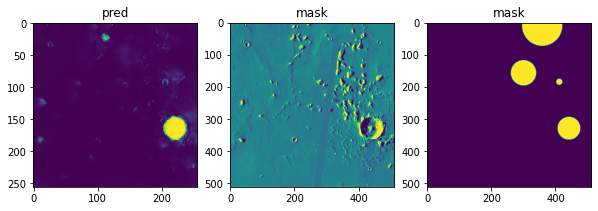

1/1 [==============================] - 0s 25ms/step


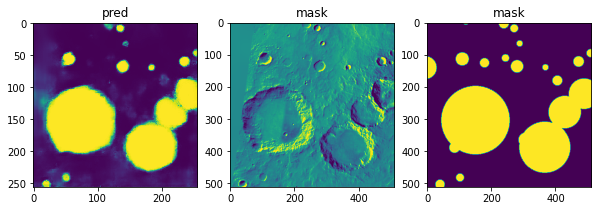

1/1 [==============================] - 0s 19ms/step


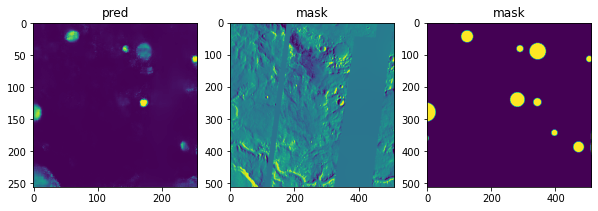

1/1 [==============================] - 0s 18ms/step


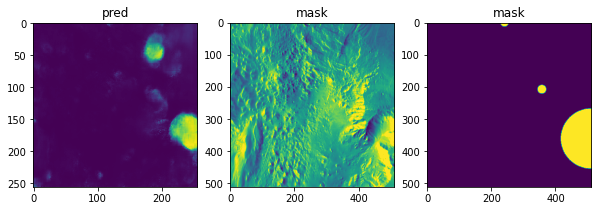

1/1 [==============================] - 0s 17ms/step


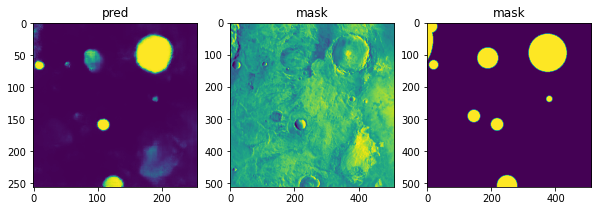

1/1 [==============================] - 0s 20ms/step


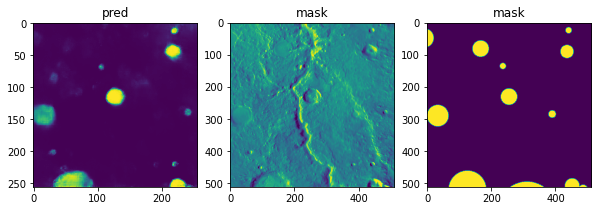

1/1 [==============================] - 0s 17ms/step


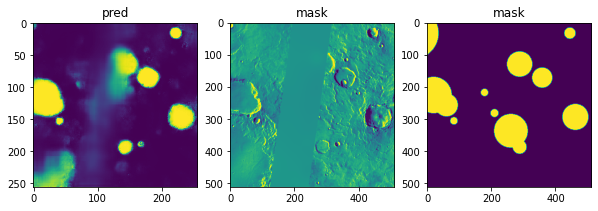

1/1 [==============================] - 0s 26ms/step


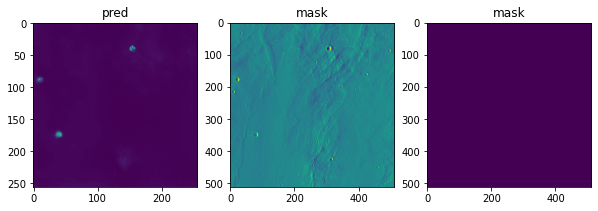

1/1 [==============================] - 0s 19ms/step


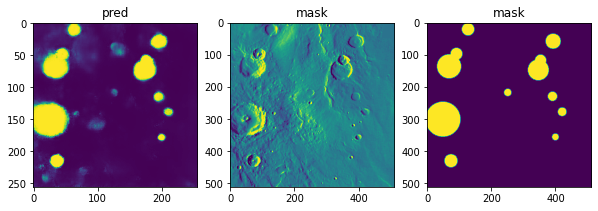

In [31]:
import cv2
import numpy as np
for i in range(20):
    n=0
    # creating an og_image object
    img = cv2.imread(data_test['input_image'].iloc[i])
    img= cv2.resize(img[:,:,2:3],(256, 256))
    img= img[np.newaxis,:]
    img = img.reshape((1,256,256,1))    
    pred=model.predict(img)

    plt.figure(figsize=(10,10))
    plt.subplot(1,3,n+1)
    plt.title('pred')
    plt.imshow(np.squeeze(pred[0,:,:,0]))

    plt.subplot(1,3,n+2)
    plt.title('mask')
    inp = cv2.imread(data_test['input_image'].iloc[i]) 
    plt.imshow(np.squeeze(inp[:,:,1:2]))


    plt.subplot(1,3,n+3)
    plt.title('mask')
    mask = cv2.imread(data_test['output_filled'].iloc[i]) 
    plt.imshow(np.squeeze(mask[:,:,1:2]))


  
    plt.show()